# Exercice 1:

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def charger(fileName):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # x[i][j]
    x = []
    
    with open('test.csv') as file:
        reader = csv.reader(file, delimiter=',')
        for line in reader:
            x.append([int(line[0]), int(line[1]), float(line[2])])
        
    x = np.array(x, dtype=float)
    #print('Result: ', x)
    
    xs, ys, vals = x[:,0], x[:, 1], x[:, 2]
    
    for x, y, val in zip(xs, ys, vals):
        ax.text(x=x, y=y, z=0, s=str(val))
        
    ax.scatter(xs, ys)
    
    ax.set_xlabel('CoordX')
    ax.set_ylabel('CoordY')
    plt.show()
    return ax
            
ax = charger('test.csv')        

<Figure size 2000x1000 with 1 Axes>

# Exercice 2-5:

L’algorithme dit du « Marching Square » traite chaque cellule d’un maillage (ou une grille) indépendamment les uns des autres. Le carré est situé dans le coin (0,0) de la grille, puis il va avancer d'une cellule à la fois toujours dans la direction des X; Quand Xmax est atteint, X est réinitialisé à 0, Y est incrémenté et l’on recommence. Le processus s'arrête quand l'intégralité de la grille a été parcourue. Les cellules sont donc examinées l'une après l'autre, une cellule
contient un tronçon du contour ou alors elle est vide. Pour trouver les cellules non-vides, il faut chercher celles qui ont des bords qui sont à cheval sur la valeur de référence. On peut caractériser chaque cellule en examinant chacun de ses sommets et en testant si les valeurs scalaires correspondantes sont supérieures (+) ou inférieures (-) à la valeur de référence. Sur la figure ci-dessus, la valeur de référence est 5.

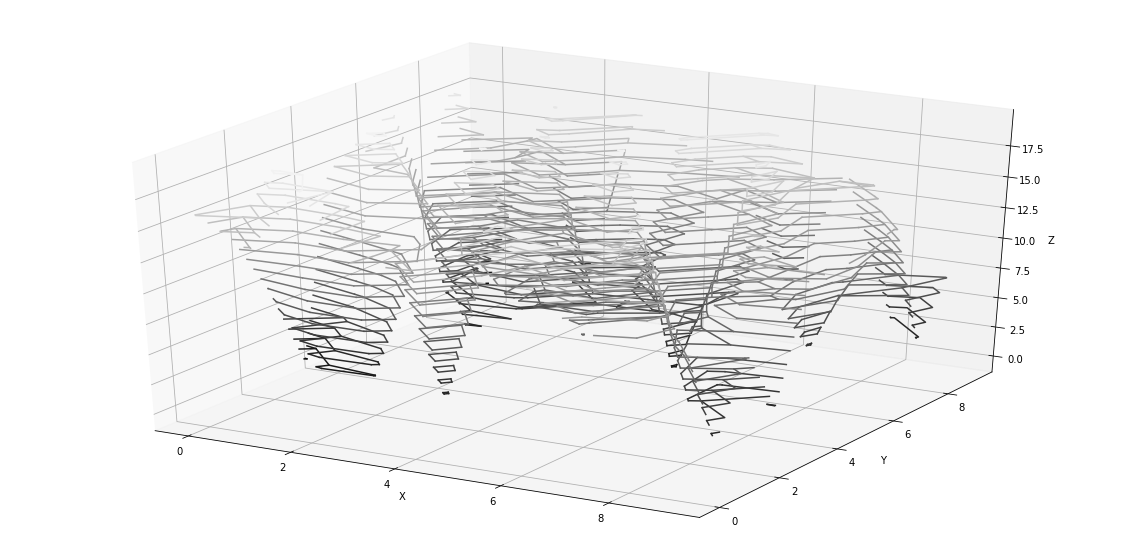

In [2]:
import random

def marching_square_contour(ax, square, ref, vTable, color, flatMap):
    edges = []
    for e in range(len(square)):
        edges.append([square[e], square[(e+1)%4]])
    
    points = []
    for edge in edges:
        p1, p2 = edge[0], edge[1]
        v1, v2 = vTable[p1[0]][p1[1]], vTable[p2[0]][p2[1]]
        #print(p1, v1, p2, v2)
        if (v1 <= ref and ref <= v2) or (v2 <= ref and ref <= v1) :
            p = p1 + (ref-v1)/(v2-v1)*(p2-p1)
            points.append(p)
        #else: points.append(None)
        
    points = np.array(points)
    nbPoints = len(points)
    if nbPoints >= points.ndim:
        px = points[:, 0]
        py = points[:, 1]
        pz = np.full((nbPoints, ), ref) if not flatMap else np.zeros((nbPoints, ))
        
        ax.plot(xs=px, ys=py, zs=pz, color=color)
    
    
def marching_square(fig, sizeTab, maxRand, sizeBin, flatMap=True):      
    ax = fig.add_subplot(111, projection='3d')
    array = np.ndarray((sizeTab, sizeTab), dtype=float)
    
    # Fill the input array
    x = []
    for i in range(sizeTab):
        for j in range(sizeTab):
            val = random.uniform(0., maxRand)
            array[i][j] = val
            x.append([i, j, val])
   
    
    # Prepare the data
    x = np.array(x, dtype=float)    
    xs, ys, vals = x[:,0], x[:,1], x[:,2]
    
    minVal = np.min(vals)
    maxVal = np.max(vals)
    
    zs = np.array([int(val) for val in vals]) if not flatMap else np.zeros((len(vals), ))
    clrs = np.array([ (val-minVal)/(maxVal-minVal) for val in vals ])
    clrs = np.array([(clr, clr, clr, 1) for clr in clrs])
                
    height = array.shape[0]
    width = array.shape[1]
    
    # Contour
    for n in range(sizeBin):    
        for i in range( height - 1 ) :
            for j in range( width - 1 ) :
                square = np.array([(i, j), (i, j+1), (i+1, j+1), (i+1, j)])
                color = n/sizeBin;
                marching_square_contour(ax, square, n, array, (color, color, color, 1), flatMap);
        
    ax.scatter(xs, ys, zs, c=clrs, alpha=0)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
def square_main():
    fig = plt.figure(figsize=(20, 10))
    marching_square(fig, 10, 20, 20, False)
    plt.show()


square_main()

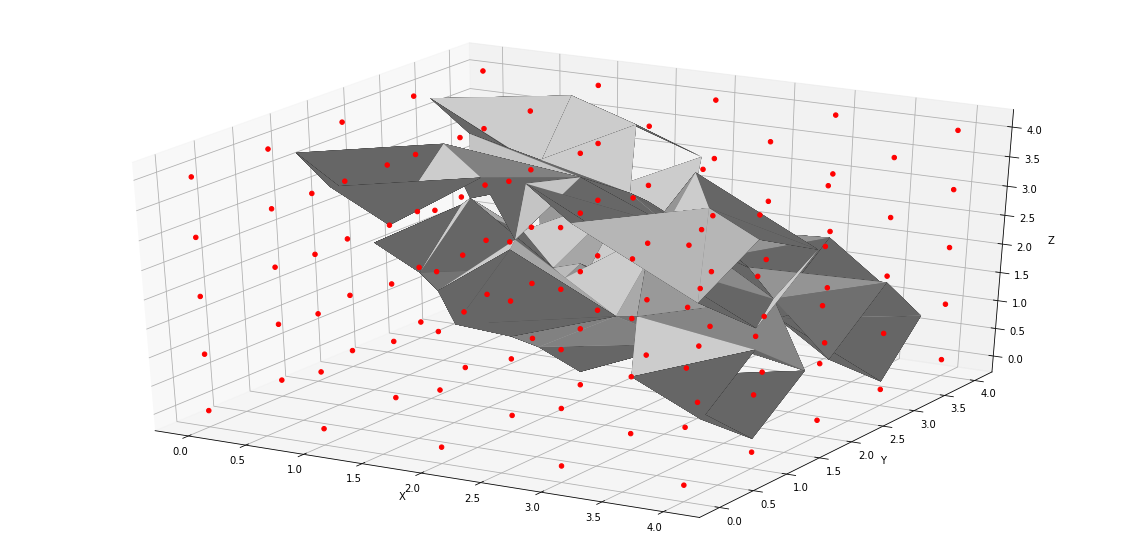

In [3]:
import random
import matplotlib.tri as mtri


def marching_cube_make_edges(cube):
    edges = []
    
    # Create all edges on each base
    for baseId in range(len(cube)):
        base = cube[baseId]
        for pId in range(len(base)):
            edges.append([
                base[pId], 
                base[(pId+1)%len(base)]
            ])
            
            # Create all edges connecting each base
            if baseId < len(cube)-1:
                upperBase = cube[baseId+1]
                edges.append([
                    base[pId],
                    upperBase[pId]
                ])
    
    return np.array(edges)
            

def marching_cube_contour(ax, cube, ref, vTable, color):
        
    edges = marching_cube_make_edges(cube)
      
    points = []
    for edge in edges:
        p1, p2 = edge[0], edge[1]
        v1, v2 = vTable[p1[0]][p1[1]][p1[2]], vTable[p2[0]][p2[1]][p2[2]]
        if (v1 <= ref and ref <= v2) or (v2 <= ref and ref <= v1) :
            p = p1 + (ref-v1)/(v2-v1)*(p2-p1)
            #ax.text(p[0], p[1], p[2], s=str(p), va='center', ha='center', color='red')
            points.append(p)
        
    points = np.array(points)
    nbPoints = len(points)
    if nbPoints >= points.ndim:
        px = points[:, 0]
        py = points[:, 1]
        pz = points[:, 2]
        
        triang = mtri.Triangulation(px, py)
        ax.plot_trisurf(px, py, pz, triangles=triang.triangles, color=color);
           
    
    
def marching_cube(fig, sizeTab, maxRand, sizeBin, showCubes=False):      
    ax = fig.add_subplot(111, projection='3d')
    array = np.ndarray((sizeTab, sizeTab, sizeTab), dtype=float)
    
    # Fill the input array
    x = []
    #rands = np.random.uniform(0., maxRand, sizeTab**3)
    #rands = np.random.normal(maxRand/2, 1, sizeTab**3)
    rands = np.random.standard_cauchy(sizeTab**3)

    for i in range(sizeTab):
        for j in range(sizeTab):
            for k in range(sizeTab):
                val = array[i][j][k] = rands[i*j*k]
                x.append([i, j, k, val])
      
    # Prepare the data
    x = np.array(x, dtype=float)    
    xs, ys, zs, vals = x[:,0], x[:,1], x[:,2], x[:, 3]
    
    minVal = np.min(vals)
    maxVal = np.max(vals)
                
    sizeX, sizeY, sizeZ = array.shape
    
    # Contour
    for n in range(sizeBin):    
        for i in range( sizeX - 1 ) :
            for j in range( sizeY - 1 ) :
                for k in range(sizeZ - 1):
                    cube = np.array([
                        [(i, j, k), (i, j+1, k), (i+1, j+1, k), (i+1, j, k)], # Face inférieure
                        [(i, j, k+1), (i, j+1, k+1), (i+1, j+1, k+1), (i+1, j, k+1)] # Face supérieure
                    ])
                    color = n/sizeBin;
                    marching_cube_contour(ax, cube, maxRand/sizeBin, array, (color, color, color, 1));
        
    ax.scatter(xs, ys, zs, c='red', alpha=showCubes)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
def cube_main():
    fig = plt.figure(figsize=(20, 10))
    marching_cube(fig, sizeTab=5, maxRand=5, sizeBin=5, showCubes=True)
    plt.show()


cube_main()